<table>
<tr>
    <td width=10%><img src="./img/logo_lri.jpg"></td>
    <td width=30%><img src="./img/medi-chal_logo.png" height=15%></img></td>
</tr>

</table>

<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">
    Être ou ne pas être ?
</a></center>
<br/>
<center><a style="font-size: 22pt; font-weight: bold">
    Un problème de classification binaire sur des données médicales artificelles
<br/>

---

# Membres du groupe

**Minimum 2, Maximum 3**

<span style="color:red">
    Répondre ci-dessous
</span>

* Hatanbaatar Van Atartugs, Erkhembileg
* Maille, Gabriel
* Lavoine, Paul-Louis

# Présentation du challenge

## La question principale de ce challenge est : 

* Comment prédire la survie d'un·e patient·e compte tenu de son dossier médical ? 
    
* Plus précisément, vous devrez prédire la survie des patient·e·s pendant leur séjour à l'hôpital
 
Chaque jour, le personnel soignant collecte de nombreuses informations sur les patient·e·s en posant des questions et en utilisant des outils de mesure (stéthoscope, analyse de sang, capteurs, etc.). Ces données sont très utiles pour surveiller l'état de santé, diagnostiquer et choisir les traitements.

Elles peuvent également être utilisées pour l'analyse statistique prédictive.

## Données

L'ensemble de données contient des informations sur 80'000 patient·e·s, représentés par des variables (descripteurs) catégorielles, binaires et numériques. Ces variables sont, par exemple, l'âge, le sexe, l'origine ethnique, l'état matrimonial, ainsi que des données médicales telles que la tension artérielle ou le taux de glucose. Il y a un total de 342 variables.

La classe (étiquette ou label) à prédire est une variable binaire indiquant si la·le patient·e est décédé·e ou non pendant son séjour à l'hôpital. Heureusement, la plupart survivent :

![](img/tobe.png)

## Tâche

La tâche consiste à créer un modèle capable d'apprendre à partir des données et de faire des prédictions (apprentissage supervisé). Chaque instance (patient·e) possède une variable indiquant si elle·il est décédé·e ou non pendant son séjour à l'hôpital.

Références et crédit :

Isabelle Guyon, Kristin Bennett, Andrew Yale, Adrien Pavao, Thomas Gerspacher

## Instructions

Le but de ce TP est de travailler sur un challenge de prédiction de la mortalité.

Le lien vers le challenge :
https://codalab.lisn.upsaclay.fr/competitions/12130

* **Étape 1 :** S'enregistrer sur https://codalab.lisn.upsaclay.fr

* **Étape 2:** Téléchargez le jeu de données à partir de la [page](https://codalab.lisn.upsaclay.fr/competitions/12130#participate-get_starting_kit) "Participate > Files > Public Data".

* **Étape 3:** Parcourez ce notebook. Vous devrez lire, exécuter, **coder vos propres méthodes** et **répondre aux questions**. Utilisez la cellule ***code*** pour le codage et la cellule ***markdown*** pour répondre aux questions.

## Évaluation du projet

* **4 points** pour la partie compréhension et analyse exploratoire
    
* **4 points** pour un code propre et bien documenté

* **4 points** pour la qualité du modèle (sélection du modèle, sélection des hyperparamètres)

* **4 points** pour une bonne évaluation des performances du modèle

* **4 points** pour la qualité de la présentation orale 

* **1 point bonus** pour l'équipe gagnante du challenge

### FAQ

* Soumettre uniquement le notebook sur eCampus

* La partie texte (explications, résultats, problèmes, sans le code) ne doit pas dépasser 3 pages A4 11pt (< 1500 mots)

# Challenge

Module requis : `imblearn` (à installer avec `conda`)

`conda install -c conda-forge imbalanced-learn`

In [1]:
#conda install -c conda-forge imbalanced-learn

In [2]:
import platform
from datetime import datetime
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import imblearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn import (
    decomposition,
    discriminant_analysis,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
    preprocessing,
    svm,
)


In [3]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

# Set precision for pd and np (np: suppress also sci notation)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = "{:,.3g}".format

sns.set_style("darkgrid")
sns.set_context("notebook")

print(pd.__version__)       # 2.0.0
print(sklearn.__version__)  # 1.2.2

1.5.3
1.2.2


## 1. Compréhension du problème

### Expliquez brièvement la tâche avec vos mots

<span style="color:red">
    Répondre ci-dessous
</span>

La tâche consiste à prédire la survie des patients hospitalisés en utilisant des données médicales collectées pendant leur séjour. On a des informations démographiques et médicales, telles que l'âge, le sexe, l'origine ethnique, l'état matrimonial, la tension artérielle et le taux de glucose, etc... L'ensemble de données contient 80 000 patients avec un total de 342 variables.

Le but est de construire un modèle d'apprentissage supervisé capable d'apprendre à partir des données fournies et de prédire si un patient survivra ou non à son séjour à l'hôpital. Le modèle devra être évalué en termes de performance, de qualité et de précision pour s'assurer qu'il est suffisamment fiable pour être utilisé dans des scénarios réels.

### Métrique utilisée

Pourquoi la métrique utilisée ici est la [`sklearn.metrics.balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) plutôt que simplement l'[`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) ?

<span style="color:red">
    Répondre ci-dessous
</span>

La métrique balanced_accuracy_score est choisie plutôt que la accuracy_score car les données sont déséquilibrées. Dans cet ensemble de données, la majorité des patients survivent à leur séjour à l'hôpital, ce qui crée un déséquilibre entre les classes.

Lorsque les données sont déséquilibrées, utiliser la accuracy_score peut donner une fausse impression de bonnes performances. Un modèle qui prédit toujours la classe majoritaire aura une précision élevée, même s'il ne prédit jamais correctement la classe minoritaire.

La balanced_accuracy_score aborde ce problème en calculant la précision pour chaque classe, puis en prenant la moyenne de ces précisions. Donc elle donne autant d'importance à la prédiction correcte de chaque classe, indépendamment de leur taille. Cela permet d'évaluer plus justement la performance du modèle sur les données déséquilibrées et d'obtenir une estimation plus fiable de sa capacité à prédire les deux classes.

## 2. Chargement des données

In [4]:
DATA = Path("C:\\Users\\erkhe\\OneDrive\\Bureau\\ProjetISD2").expanduser()

#DATA = Path("public_data")

PRED_PATH = Path("Submissions")

DROP_VARS = ["ADMITTIME", "DISCHTIME", "SUBJECT_ID", "HADM_ID"]

assert DATA.is_dir()

In [5]:
features = pd.read_csv(
    DATA / "mimic_synthetic_feat.name", header=None
).values.flatten()

labels = pd.read_csv(
    DATA / "mimic_synthetic_label.name", header=None
).values.flatten()

x_df = pd.read_csv(
    DATA / "mimic_synthetic_train.data",
    header=None,
    names=features,
    sep=" ",
)

# Remove variables that are not relevant
x_df.drop(columns=DROP_VARS, inplace=True)

ys = pd.Series(
    pd.read_csv(
        DATA / "mimic_synthetic_train.solution",
        header=None,
        names=labels,
        sep=" ",
    ).values.flatten(),
    name="INSURANCE"
)


In [6]:
print(x_df.shape)
x_df.head(5)

(79999, 337)


,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,Private,ENGL,CATHOLIC,DIVORCED,WHITE,F,21,57.2,109,70.8,...,0,0,0,0,0,0,0,0,0,0
1,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,M,39,79.3,121,96.9,...,0,0,0,0,0,0,0,0,0,1
2,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,M,40,118,175,141,...,0,0,0,0,0,0,0,0,0,0
3,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,M,75,83.8,89.2,86.1,...,0,0,0,0,0,0,0,0,1,0
4,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,F,55,60.9,106,80.6,...,0,0,0,0,0,0,0,0,0,0


C'est **l'ensemble d'entrainement**. Cela signifie que vous avez accès aux étiquettes et que vous pouvez l'utiliser comme vous le souhaitez pour préparer votre modèle.

Plus tard, vous ferez en sorte que votre modèle tire des prédictions de **l'ensemble de test** afin de les téléverser sur Codalab et d'obtenir un score sur des données non vues lors de l'entrainement des modèles.

In [7]:
# Load test set
x_test_df = pd.read_csv(
    DATA / "mimic_synthetic_test.data",
    header=None,
    names=features,
    sep=" ",
)

# Remove variables that are not relevant
x_test_df.drop(columns=DROP_VARS, inplace=True)

print(x_test_df.shape)
x_test_df.head(3)

(20001, 337)


,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,Self_Pay,ENGL,OTHER,MARRIED,WHITE,F,18,72.6,113,96.5,...,0,0,0,0,0,0,0,0,0,0
1,Medicare,ENGL,NOT_SPECIFIED,SINGLE,BLACK/AFRICAN_AMERICAN,F,56,66.6,107,83.8,...,0,0,0,0,0,0,0,0,1,0
2,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,M,32,69.7,103,87.3,...,0,0,0,0,0,0,0,0,0,0


## 3. Analyse exploratoire

#### Types des variables

In [8]:
types = pd.read_csv(DATA / "mimic_synthetic_feat.type", header=None).set_index(
    features
)[0]

types.value_counts()

Numerical      226
Binary         107
Categorical      8
Name: 0, dtype: int64

#### Distribution de la variable cible

In [9]:
ys.describe()

count   8e+04
mean    0.035
std     0.184
min         0
25%         0
50%         0
75%         0
max         1
Name: INSURANCE, dtype: float64

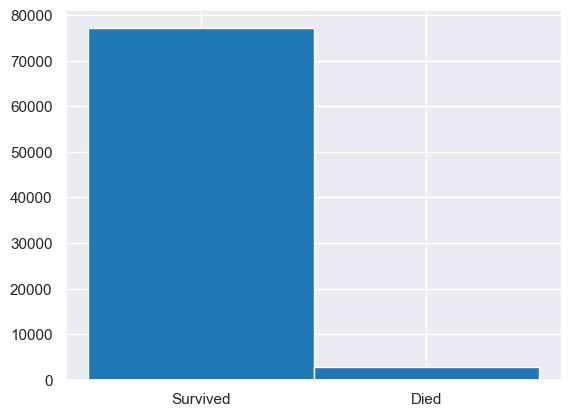

In [10]:
ys.hist(bins=2, grid=True, align="left")
plt.xticks([0, 0.5], ["Survived", "Died"])
# plt.savefig("img/tobe.png", dpi=300)
plt.show()

### Code : Produire les graphiques suivants

* Diagrammes à barres de certaines variables catégorielles (par exemple "LANGUAGE", "MARITAL_STATUS")

* Montrez la corrélation entre certaines variables et la variable cible y

* Un autre graphique ou toute analyse exploratoire à laquelle vous pouvez penser

Exemple

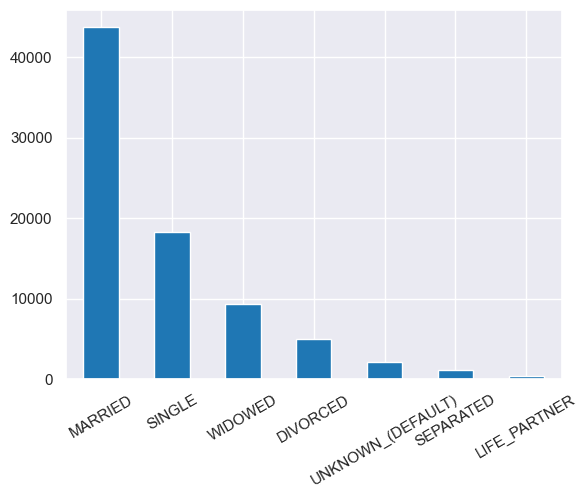

In [11]:
x_marital_cnts = x_df["MARITAL_STATUS"].value_counts()
x_marital_cnts.plot.bar(rot=30)
plt.show()

<span style="color:red">
    Répondre ci-dessous
</span>

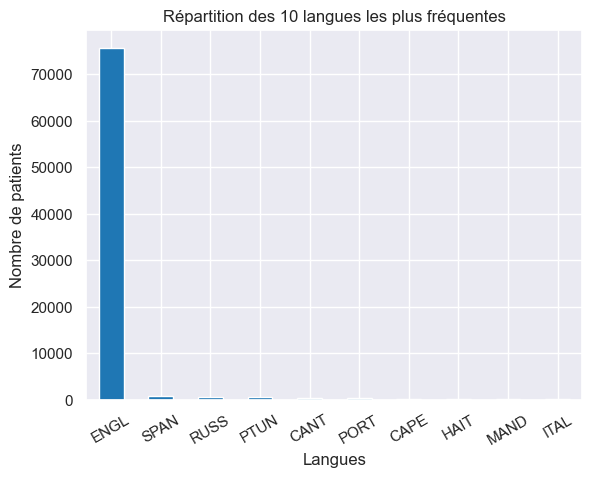

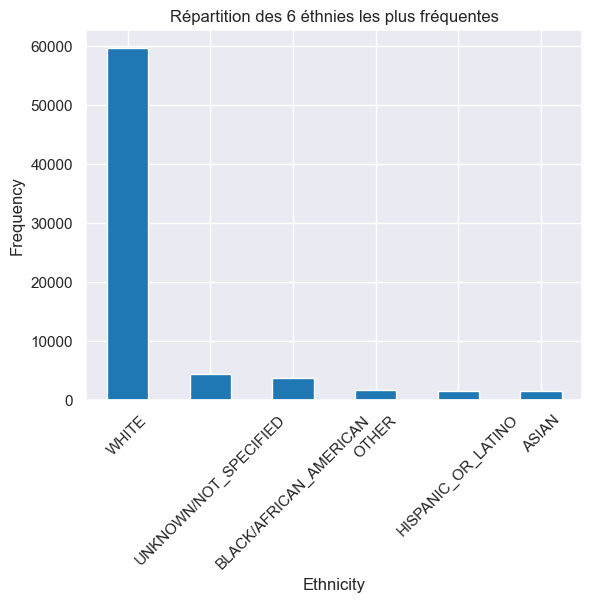

In [12]:
# Diagramme à barres pour la variable "LANGUAGE"
top_n = 10
x_language_cnts = x_df["LANGUAGE"].value_counts().head(top_n)
x_language_cnts.plot.bar(rot=30)
plt.title("Répartition des {} langues les plus fréquentes".format(top_n))
plt.xlabel("Langues")
plt.ylabel("Nombre de patients")
plt.show()


# Diagramme à barres pour la variable "ETHNICITY"
top_n = 6
x_ethnicity_cnts = x_df["ETHNICITY"].value_counts().head(top_n)
x_ethnicity_cnts.plot.bar(rot=45)
plt.title('Répartition des {} éthnies les plus fréquentes'.format(top_n))
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.show()


#### Corrélations

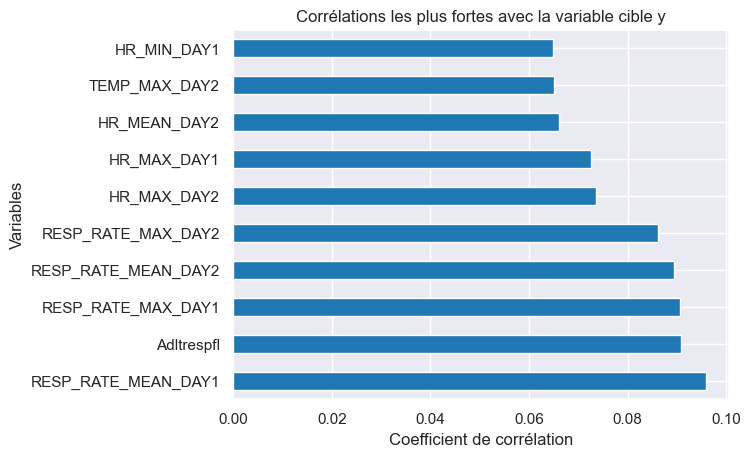

In [13]:
# TODO: Bar plot of the variables most correlated with y

# on calcule la corrélation avec la variable cible ys

corr = x_df.corrwith(ys, axis=0, method='pearson',numeric_only=True)

# on trie les corrélations par ordre décroissant
corr = corr.sort_values(ascending=False)

# Graphique des corrélations les plus fortes avec la variable cible y
corr_top_n = 10
corr_top = corr.head(corr_top_n)
corr_top.plot.barh()
plt.title("Corrélations les plus fortes avec la variable cible y")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.show()

Astuce :

* Utilisez un graphique avec des barres horizontales `barh` (pour visualiser les valeurs positives et négatives)

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

#### Autres graphiques ou résultats d'une analyse exploratoire

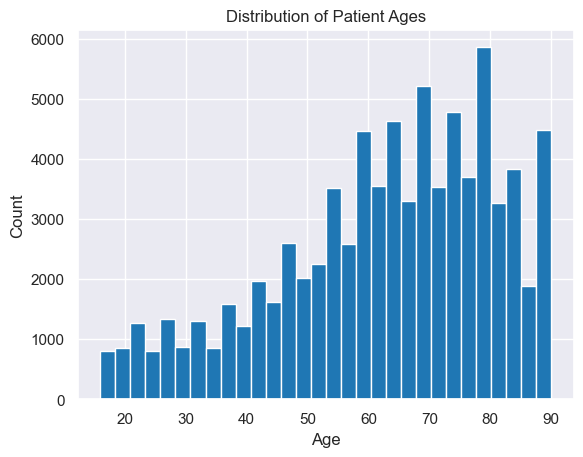

In [14]:
# Convertir la colonne "AGE" en flottant
x_df["AGE"] = pd.to_numeric(x_df["AGE"], errors='coerce')

# Tracer l'histogramme de l'âge
plt.hist(x_df["AGE"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Patient Ages")
plt.show()

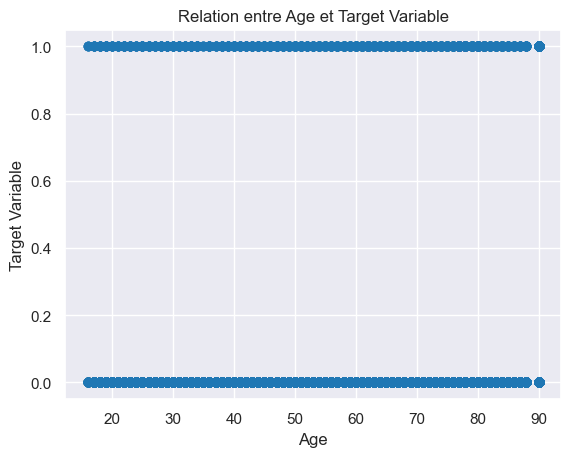

In [15]:
plt.scatter(x_df["AGE"], ys)
plt.xlabel("Age")
plt.ylabel("Target Variable")
plt.title("Relation entre Age et Target Variable")
plt.show()

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

1er graph :
On peut voir ici que l'age moyen des patients est assez elévés (environ 70ans) 
2eme graph :
Le graph ne permet pas de conclusion précise, mais on peut affirmer que qu'aucun âge à un taux de mortalité trop différent des autres

## 4. Pre-traitement

### Code : Traitement du problème des valeurs manquantes (ou non définies, NAN)

La solution la plus simple est d'éliminer l'ensemble des colonnes où il y a des données manquantes, mais on perd de l'information. 

Vu le faible nombre d'instances concernées (maximum 6 : voir ci-dessous) il parait plus pertinent de supprimer les lignes (instances) plutôt que les colonnes entières (variables).

La solution que nous choisissons ici est une troisième, celle de remplacer les valeurs non définies par la valeur la plus probable de la variable. Comme ces valeurs manquantes concernent exclusivement des variables catégorielles et binaires, la valeur la plus probable est le *mode* (voir cours : `part-5-slides.pdf`).

In [16]:
print(x_df.shape, x_test_df.shape)

(79999, 337) (20001, 337)


In [17]:
x_nans = x_df.isna().sum()
x_miss = x_nans[x_nans > 0]
x_miss

LANGUAGE                              1
MARITAL_STATUS                        1
ICU                                   2
ECodes:Adverseeffectsofmedicalcare    6
Otnutritdx                            2
Othnervdx                             1
dtype: int64

In [18]:
x_test_nans = x_test_df.isna().sum()
x_test_miss = x_test_nans[x_test_nans > 0]
x_test_miss

LANGUAGE                              2
ECodes:Adverseeffectsofmedicalcare    3
dtype: int64

In [19]:
x_miss_rows = x_df.isna().any(axis="columns")

x_df.loc[x_miss_rows, x_miss.index]

,LANGUAGE,MARITAL_STATUS,ICU,ECodes:Adverseeffectsofmedicalcare,Otnutritdx,Othnervdx
2251,ENGL,MARRIED,MICU,NaN,0,0
9983,ENGL,MARRIED,MICU,0,NaN,0
10549,ENGL,MARRIED,MICU,0,NaN,0
10831,ENGL,MARRIED,MICU,NaN,1,0
17012,ENGL,MARRIED,CSRU,NaN,0,1
23088,ENGL,MARRIED,NaN,0,0,0
32539,ENGL,NaN,CSRU,0,0,0
42762,ENGL,SINGLE,TSICU,NaN,0,0
53191,NaN,MARRIED,MICU,0,0,0
53390,CAPE,MARRIED,NaN,0,0,0


#### Remplacement des NAN

In [20]:
na_cols = set(x_miss.index) | set(x_test_miss.index)

for col in na_cols:
    x_df[col].fillna(x_df[col].mode()[0], inplace=True)
    x_test_df[col].fillna(x_test_df[col].mode()[0], inplace=True)

In [21]:
print(
    x_df.isna().any().any(),
    x_test_df.isna().any().any(),
    sep="\n",
)

False
False


In [22]:
print(x_df.shape, x_test_df.shape)

(79999, 337) (20001, 337)


### Gestion des catégories rares

Simplifiez les données en regroupant par exemple les catégories rares.

In [23]:
def merge_rare_categories(dfs, col, keeps=None, keep_n=5):
    if keeps is None:
        keeps = x_df[col].value_counts()[:keep_n].index
        print(keeps)

    for df in dfs:
        df.loc[~df[col].isin(keeps), col] = "OTHER"


merge_rare_categories([x_df, x_test_df], col="RELIGION", keep_n=5)
print(x_test_df["RELIGION"].value_counts())

Index(['CATHOLIC', 'NOT_SPECIFIED', 'UNOBTAINABLE', 'PROTESTANT_QUAKER',
       'JEWISH'],
      dtype='object')
CATHOLIC             7517
NOT_SPECIFIED        3764
OTHER                2449
UNOBTAINABLE         2208
PROTESTANT_QUAKER    2208
JEWISH               1855
Name: RELIGION, dtype: int64


#### Code : Effectuez des regroupements de catégories rares pour d'autres variables si vous le jugez nécessaire

<span style="color:red">
    Répondre ci-dessous
</span>

In [24]:
#On fait un regroupement de catégories rares sur language car elles sont nombreuses 
merge_rare_categories([x_df, x_test_df], col="LANGUAGE", keep_n=5)
print(x_test_df["LANGUAGE"].value_counts())

Index(['ENGL', 'SPAN', 'RUSS', 'PTUN', 'CANT'], dtype='object')
ENGL     18883
OTHER      485
SPAN       258
RUSS       151
PTUN       147
CANT        77
Name: LANGUAGE, dtype: int64


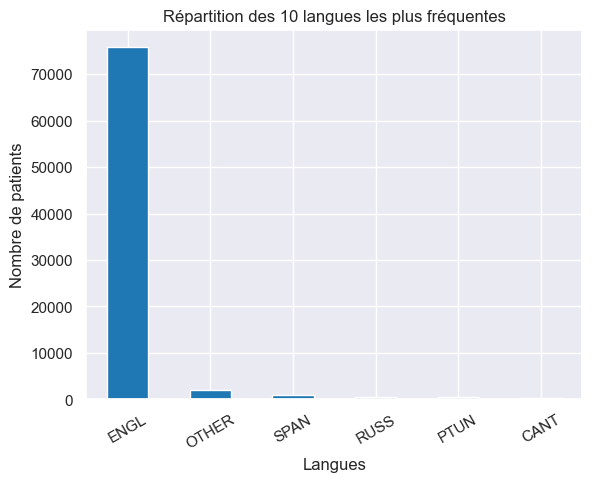

In [25]:
#Réaffichage des langues
top_n = 10
x_language_cnts = x_df["LANGUAGE"].value_counts().head(top_n)
x_language_cnts.plot.bar(rot=30)
plt.title("Répartition des {} langues les plus fréquentes".format(top_n))
plt.xlabel("Langues")
plt.ylabel("Nombre de patients")
plt.show()


### Transformation des données catégorielles en nombres entiers en utilisant deux types d'encodage

Les variables catégorielles sont présentées sous forme de chaines de caractères. La plupart des modèles ne pourront pas les prendre en entrée.

#### Encodage numérique simple

Deux des méthodes les plus simples sont `LabelEncoder` de Scikit-Learn et `factorize` de pandas. Elles consistent simplement à remplacer chaque nouvelle catégorie rencontrée par un entier, en commençant par 0. Ce n'est cependant peut-être pas la méthode la plus efficace, car elle présuppose une proximité entre les catégories codées avec des valeurs proches.

In [26]:
def label_encode(df, other_df, only_binary=False):
    """
    Select categorical variables and encode them in integers.
    """
    char_cols = df.dtypes.pipe(lambda x: x[x == "object"]).index
    # print(char_cols)

    for col in char_cols:
        n_categories = len(x_df[col].unique())

        if not only_binary or n_categories == 2:
            codes, uniques = pd.factorize(df[col])
            df[col] = codes

            # Create conversion dic to convert values of test set as well
            cat2code = {k: v for v, k in enumerate(uniques)}
            other_df[col] = other_df[col].map(cat2code)

In [27]:
x_df.head(3)

,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,Private,ENGL,CATHOLIC,DIVORCED,WHITE,F,21,57.2,109,70.8,...,0,0,0,0,0,0,0,0,0,0
1,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,M,39,79.3,121,96.9,...,0,0,0,0,0,0,0,0,0,1
2,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,M,40,118,175,141,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print(x_df.shape, ys.shape)

(79999, 337) (79999,)


In [29]:
x_fact_df = x_df.copy()
x_test_fact_df = x_test_df.copy()

label_encode(x_fact_df, x_test_fact_df)

In [30]:
x_fact_df.head(3)

,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,0,0,0,0,0,0,21,57.2,109,70.8,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,39,79.3,121,96.9,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,2,1,1,40,118,175,141,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x_test_fact_df.head(3)

,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,3,0,5,3,0,0,18,72.6,113,96.5,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,1,4,0,56,66.6,107,83.8,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,32,69.7,103,87.3,...,0,0,0,0,0,0,0,0,0,0


#### Encodage 1-Hot

Un autre type d'encodage est souvent plus efficace, il a notamment l'avantage de ne pas ordonner les classes d'une manière particulière (pas forcément en adéquation avec la proximité de ces classes entre elles).

Une méthode de pandas permet de le réaliser en 1 ligne de code avec la fonction `get_dummies`.

Exemple d'encodage 1-hot avec la fonction `get_dummies` de pandas (pour MARITAL_STATUS) :

|    |   DIVORCED |   LIFE_PARTNER |   MARRIED |   SEPARATED |   SINGLE |   UNKNOWN_(DEFAULT) |   WIDOWED |
|---:|-----------:|---------------:|----------:|------------:|---------:|--------------------:|----------:|
|  0 |          1 |              0 |         0 |           0 |        0 |                   0 |         0 |
|  1 |          0 |              0 |         0 |           0 |        1 |                   0 |         0 |
|  2 |          0 |              0 |         0 |           0 |        0 |                   0 |         1 |
|  3 |          0 |              0 |         1 |           0 |        0 |                   0 |         0 |
|  4 |          0 |              0 |         1 |           0 |        0 |                   0 |         0 |

In [32]:
label_encode(x_df, x_test_df, only_binary=True)

x_all_1h_df = pd.get_dummies(pd.concat([x_df, x_test_df]))

x_1h_df = x_all_1h_df.iloc[: len(x_df)].copy()
x_test_1h_df = x_all_1h_df.iloc[len(x_df):].copy()

print(x_df.shape, x_test_df.shape)
print(x_1h_df.shape, x_test_1h_df.shape)

(79999, 337) (20001, 337)
(79999, 401) (20001, 401)


#### Suppression des variables à valeur unique (constantes)

In [33]:
const_cols = {col for col in x_1h_df if len(x_1h_df[col].unique()) == 1}
len(const_cols)

173

In [34]:
x_1h_df.drop(const_cols, axis="columns", inplace=True)
x_test_1h_df.drop(const_cols, axis="columns", inplace=True)

print(x_1h_df.shape, x_test_1h_df.shape)

(79999, 228) (20001, 228)


### Création de l'ensemble de validation

In [35]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
    x_1h_df, ys, test_size=0.3
)
# VARS: x_df, x_fact_df, x_1h_df

### Réduction de la dimension via l'ACP (PCA)

Testez l'ACP pour réduire le nombre de dimensions et observez si cela améliore le résultat.

Avant d'appliquer la ACP, il est conseillé de centrer-réduire les données (e.g., via `preprocessing.StandardScaler()`).

<span style="color:red">
    Répondre ci-dessous
</span>

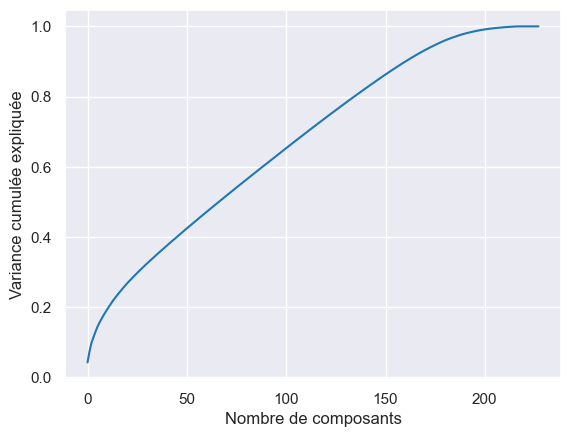

Nombre de composants pour conserver 95% de variance: 178


In [36]:
# TODO: PCA
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
x_valid_pca = pca.transform(x_valid_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composants')
plt.ylabel('Variance cumulée expliquée')
plt.show()
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print("Nombre de composants pour conserver 95% de variance:", n_components)
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_scaled)
x_valid_pca = pca.transform(x_valid_scaled)



Proposez un graphique qui représente les 2 premières dimensions de la PCA et commentez succinctement.

<span style="color:red">
    Répondre ci-dessous
</span>

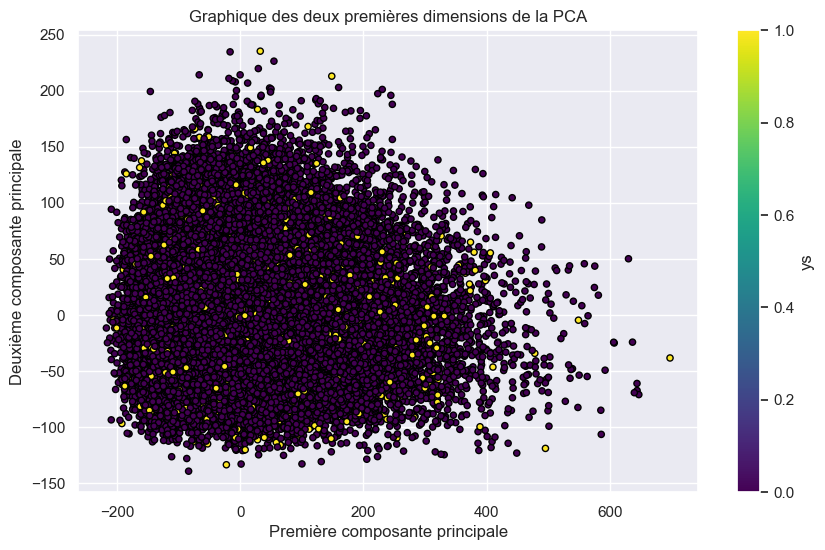

In [37]:
# TODO: Plot

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_1h_df)

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=ys, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title("Graphique des deux premières dimensions de la PCA")
plt.colorbar().set_label("ys")
plt.show()


<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

Le graphique PCA affiche un regroupement dense de points autour de la même zone, avec différentes couleurs se mélangeant et se chevauchant. Cela indique que les deux premières composantes principales ne parviennent pas à séparer clairement les différentes classes. Ces deux composantes ne capturent pas suffisamment d'information pour distinguer les classes entre elles.

## 5. Modèles de classification

Entrainez le modèle

### Baseline

`LogisticRegression` or `RandomForestClassifier`

In [38]:
SCORINGS = "balanced_accuracy"

<span style="color:red">
    Répondre ci-dessous
</span>

In [39]:
# On standardise les données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Random Forest
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

# Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## 6. Évaluations

In [40]:
y_pred = model.predict(x_valid)  # predictions

score = metrics.balanced_accuracy_score(y_valid, y_pred)  # scoring

print(f"Balanced accuracy score: {score:.3g}")

Balanced accuracy score: 0.501


### Code : Validation croisée

Le code ci-dessus utilise une méthode simple (*hold out*) pour mesurer le score de validation. Utilisez la validation croisée (pour obtenir une estimation plus fiable) combinée à l'exploration des hyperparamètres (pour améliorer les résultats).

Vous pouvez changer la valeur du nombre de validation croisée (CV) selon la valeur de l'erreur et le temps d'entrainement des modèles (compromis).

<span style="color:red">
    Répondre ci-dessous
</span>

In [41]:
#Nous avons eu des problèmes pour utiliser VSCode avec les bibliothèques, même si on faisait conda install, 
#elles n'étaient pas reconnues, nous avons dû rester sur Jupyter mais nous étions
#limités à 4 GB de mémoire donc on a eu des problèmes d'execution à partir d'ici

from sklearn.model_selection import RandomizedSearchCV

# on a réduit le nombre de plis
cv = 3
model_to_evaluate = LogisticRegression(max_iter=5000)  # Modèle de régression logistique

# Paramètres pour LogisticRegression
param_dist = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 2, 3),
    "solver": ["liblinear"],
}

# validation croisée pour obtenir une estimation plus fiable de la performance du modèle
random_search = RandomizedSearchCV(
    model_to_evaluate, param_dist, cv=cv, scoring="balanced_accuracy", n_jobs=-1, n_iter=5
)

random_search.fit(x_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres trouvés et la meilleure performance
print("Best hyperparameters found: ", random_search.best_params_)
print("Best balanced accuracy score: {:.3g}".format(random_search.best_score_))



Best hyperparameters found:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 100.0}
Best balanced accuracy score: 0.528


* **Pour 2 des modèles** (au moins 1 autre que les 2 proposés en baselines) :

    * Pour différentes valeurs d'un des hyperparamètres, donnez les `balanced_accuracy` moyennes de la validation croisée sous forme de Boxplots (ou de diagramme à bâtons avec une barre d'erreur) : voir l'exemple présenté dans le graphique ci-dessous. 
    
    * Explicitez succinctement quelles observations en tirer concernant la stabilité des prédictions.

![](img/boxplot-cv.png)

<span style="color:red">
    Répondre ci-dessous
</span>

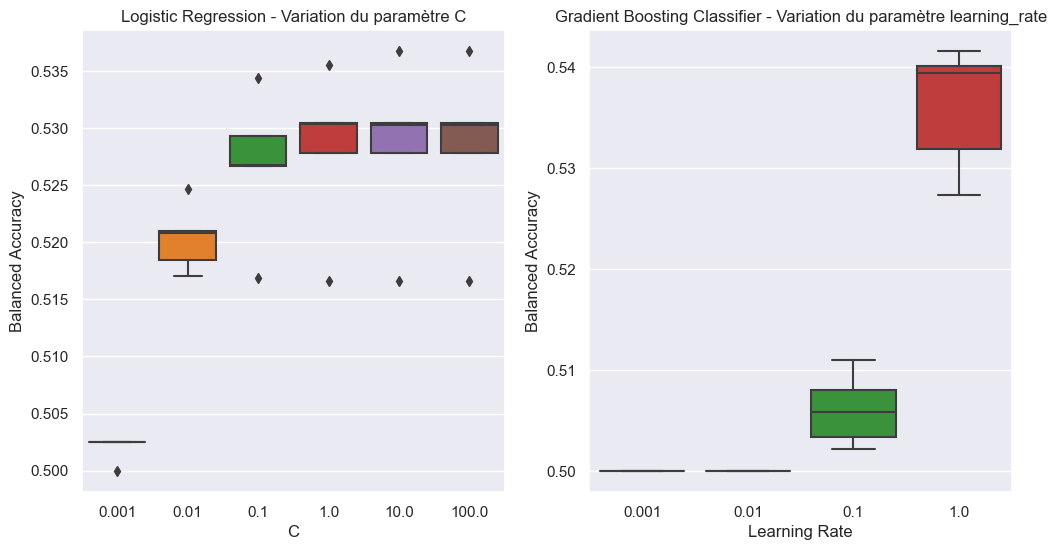

Observations concernant la stabilité des prédictions:
1. Pour la régression logistique, la variation du paramètre C n'a pas un impact significatif sur la stabilité des prédictions.
2. Pour le Gradient Boosting Classifier, on observe une stabilité des prédictions plus importante pour des valeurs faibles du learning_rate. À mesure que le learning_rate augmente, la stabilité des prédictions diminue légèrement.


In [43]:
# TODO: Boxplot ou Barplot

# Logistic Regression - Variation du paramètre C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
cv_scores_lr = []

for C in C_values:
    lr = LogisticRegression(C=C, max_iter=5000)
    cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=5, scoring='balanced_accuracy', n_jobs=-1)
    cv_scores_lr.append(cv_scores)

# Gradient Boosting Classifier - Variation du paramètre learning_rate
learning_rates = [0.001, 0.01, 0.1, 1]
cv_scores_gbc = []

for lr in learning_rates:
    gbc = GradientBoostingClassifier(learning_rate=lr)
    cv_scores = cross_val_score(gbc, x_train, y_train, cv=5, scoring='balanced_accuracy', n_jobs=-1)
    cv_scores_gbc.append(cv_scores)

# Création des DataFrames
cv_scores_lr_df = pd.DataFrame(cv_scores_lr, index=C_values).T
cv_scores_gbc_df = pd.DataFrame(cv_scores_gbc, index=learning_rates).T

# Affichage des boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=cv_scores_lr_df, ax=axes[0])
axes[0].set_title("Logistic Regression - Variation du paramètre C")
axes[0].set_xlabel("C")
axes[0].set_ylabel("Balanced Accuracy")

sns.boxplot(data=cv_scores_gbc_df, ax=axes[1])
axes[1].set_title("Gradient Boosting Classifier - Variation du paramètre learning_rate")
axes[1].set_xlabel("Learning Rate")
axes[1].set_ylabel("Balanced Accuracy")

plt.show()


<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

Dans ce code, nous explorons l'impact de la variation d'un hyperparamètre sur la performance des modèles LogisticRegression et GradientBoostingClassifier. Pour la régression logistique, nous faisons varier le paramètre C, qui contrôle la force de la régularisation, pour le Gradient Boosting Classifier, nous faisons varier le paramètre learning_rate, qui contrôle la taille des pas lors de la mise à jour des poids.

Logistic Regression:

Pour des valeurs de C inférieures à 1, on observe une augmentation de la performance du modèle (balanced_accuracy) à mesure que C augmente.
Pour C=1, 10 et 100, les performances sont presque identiques et légèrement meilleures que pour les autres valeurs de C. Cela suggère que le modèle n'est pas très sensible aux variations de C dans cet intervalle. On peut considérer que le modèle est relativement stable pour ces valeurs de C.
On peut choisir C=1, car il fournit une bonne performance avec une complexité de modèle moindre par rapport à C=10 ou C=100.

Gradient Boosting Classifier:

Pour les learning rates de 0.001 et 0.01, les performances sont faibles (balanced_accuracy proche de 0.5). Cela suggère que le modèle apprend très lentement avec ces taux d'apprentissage.
Pour le learning rate de 0.1, il y a une amélioration des performances par rapport aux taux d'apprentissage précédents, bien que la performance reste modeste.
Pour le learning rate de 1.0, les performances sont meilleures (balanced_accuracy entre 0.54 et 0.532).
En résumé, pour la régression logistique, on prend C=1, car il fournit de bonnes performances avec une complexité de modèle relativement faible. Pour le Gradient Boosting Classifier, un learning rate de 1.0 offre les meilleures performances.

* **Pour chacun de ces 2 modèles, à partir des données de validation créées précédemment** (`x_valid`, `y_valid`) :

    * Mesurez l'aire sous la courbe ROC (AUC) à l'aide de la fonction de Scikit-Learn (`roc_auc_score`) et comparez les modèles avec leur combinaison respective d'hyperparamètres offrant le meilleur résultat.

<span style="color:red">
    Répondre ci-dessous
</span>

In [45]:
from sklearn.metrics import roc_auc_score

# les meilleures combinaisons d'hyperparamètres trouvées pour les deux modèles
best_lr = LogisticRegression(C=1, max_iter=5000)
best_gbc = GradientBoostingClassifier(learning_rate=1)

# On entraîne les modèles sur les données d'entraînement
best_lr.fit(x_train_scaled, y_train)
best_gbc.fit(x_train, y_train)

# On prédit les probabilités pour les données de validation
lr_proba = best_lr.predict_proba(x_valid_scaled)[:, 1]
gbc_proba = best_gbc.predict_proba(x_valid)[:, 1]

# Calcul de l'AUC pour chaque modèle
lr_auc = roc_auc_score(y_valid, lr_proba)
gbc_auc = roc_auc_score(y_valid, gbc_proba)

print(f"Logistic Regression AUC: {lr_auc:.3g}")
print(f"Gradient Boosting Classifier AUC: {gbc_auc:.3g}")


Logistic Regression AUC: 0.821
Gradient Boosting Classifier AUC: 0.776


<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

Ici, on créé les modèles LogisticRegression et GradientBoostingClassifier en utilisant les meilleures combinaisons d'hyperparamètres trouvées précédemment. Ensuite, nous entraînons ces modèles sur les données d'entraînement (x_train_scaled pour la régression logistique et x_train pour le Gradient Boosting Classifier) et faisons des prédictions de probabilité pour les données de validation (x_valid_scaled pour la régression logistique et x_valid pour le Gradient Boosting Classifier).

Enfin, on utilise la fonction roc_auc_score de Scikit-Learn pour calculer l'AUC pour chaque modèle et les affichons. Ces valeurs peuvent être utilisées pour comparer les performances des deux modèles avec leurs meilleures combinaisons d'hyperparamètres

* **Pour le modèle et sa combinaison d'hyperparamètres offrant le meilleur résultat** :

    * Réalisez la matrice de confusion et décrivez-la succinctement.

<span style="color:red">
    Répondre ci-dessous
</span>

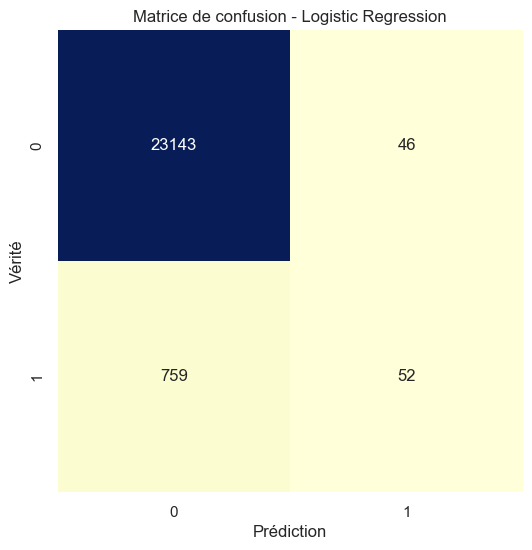

In [48]:
    # TODO: ROC

    # entrainement du modèle avec les meilleurs hyperparamètres
    best_c_value = 1
    best_lr = LogisticRegression(C=best_c_value, max_iter=5000)
    best_lr.fit(x_train_scaled, y_train)

    y_pred = best_lr.predict(x_valid_scaled)

    # calcul de la matrice de confusion
    conf_mtx = confusion_matrix(y_valid, y_pred)

    # on affiche la matrice de confusion
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mtx, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.title("Matrice de confusion - Logistic Regression")
    plt.show()


<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

On utilise une matrice de confusion pour évaluer les performances d'un modèle de classification en comparant les prédictions du modèle aux valeurs réelles.

Ici, la matrice de confusion pour le modèle de régression logistique montre que le modèle prédit correctement un grand nombre de cas négatifs (23 143 vrais négatifs) et un faible nombre de cas positifs (52 vrais positifs). Cependant, il y a un nombre assez important de faux négatifs (759) et un faible nombre de faux positifs (46).

Ces résultats suggèrent que le modèle est performant pour identifier les cas négatifs, mais a du mal à détecter les cas positifs. L'importance de ces résultats dépend du contexte de l'application et des coûts associés aux erreurs de classification. Si les faux négatifs ont un coût élevé, il peut être nécessaire d'améliorer le modèle pour réduire leur nombre. Dans l'ensemble, la matrice de confusion fournit un bon aperçu de la performance du modèle et montre les domaines dans lesquels des améliorations peuvent être apportées.

### Code : Essayez d'améliorer votre score

* Data augmentation (optionnel)

Vu le déséquilibre entre les classes à prédire (survive, died), on peut espérer améliorer le score en les rééquilibrant. Une approche typique est la génération de données (voir cours : `part-6-slides.pdf`). Une des méthodes de génération est [SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE) (voir cours théorique), elle est notamment implémentée dans le module `imblearn`.

`imblearn` a été développé pour s'interfacer facilement avec `sklearn`.
Il propose notamment une version du `pipeline` qui permet l'intégration avec `sklearn`.

Ci-dessous voici un exemple de `pipeline` intégrant `imblearn` et `sklearn`.

<span style="color:red">
    Répondre ci-dessous
</span>

In [49]:
# TODO: Data augmentation

import imblearn.pipeline
from imblearn.over_sampling import SMOTE

model = LogisticRegression(max_iter=5000)

pipe = imblearn.pipeline.Pipeline(
    [
        ("scale", preprocessing.StandardScaler()),
        ("pca", decomposition.PCA()),
        ("resample", imblearn.over_sampling.SMOTE()),
        ("model", model),
    ]
)

# Entraînez le pipeline sur les données d'entraînement
pipe.fit(x_train, y_train)

# Évaluez le pipeline sur les données de validation
y_pred = pipe.predict(x_valid)

# Calculez et affichez le score de précision équilibrée
score = metrics.balanced_accuracy_score(y_valid, y_pred)
print(f"Balanced accuracy score: {score:.3g}")


Balanced accuracy score: 0.744


### Explication de ce que vous avez réalisé, conclusion et perspectives

* Commencez par donner votre meilleur résultat obtenu lors de vos soumissions

* Expliquez le chemin qui vous y a conduit

    * Ce que vous avez essayé :

        * Ce qui a fonctionné

        * Ce qui n'a pas fonctionné et comment vous l'avez solutionné

    * Quelle méthode avez-vous utilisée pour choisir les hyperparamètres ?

    * Comparer la durée d'entrainement des principaux modèles utilisés ?

* Qu'auriez-vous fait si vous aviez eu plus de temps ?

<span style="color:red">
    Répondre ci-dessous
</span>

Dans ce projet, nous avons travaillé sur la prédiction de survie des patients avec des classes déséquilibrées.

On a commencé par tester quelques modèles de base comme la régression logistique et la forêt aléatoire, et aussi le Gradient Boosting Classifier. Ensuite, on a utilisé la validation croisée pour avoir une meilleure estimation de la performance des modèles et choisir les bons hyperparamètres.

Parmi les modèles testés, la régression logistique et le Gradient Boosting Classifier semblaient les plus prometteurs, donc on les a étudiés plus en détail. On a regardé comment différents hyperparamètres affectaient leur performance en utilisant des diagrammes à barres et des boîtes à moustaches.

On a eu quelques soucis, comme des erreurs dans le code et des problèmes de mémoire à cause de la taille des données. On a résolu ces problèmes en optimisant le code et en ajustant l'utilisation de la mémoire.

Pour choisir les meilleurs hyperparamètres, on a utilisé la validation croisée et comparé la performance des modèles avec différentes combinaisons d'hyperparamètres. On a sélectionné celle qui donnait la meilleure précision équilibrée.

En ce qui concerne le temps d'entraînement des modèles, la régression logistique est généralement plus rapide que le Gradient Boosting Classifier et la forêt aléatoire. Mais ça peut varier selon les hyperparamètres et les ressources matérielles.

Avec plus de temps, on aurait pu essayer d'autres modèles et techniques pour améliorer nos résultats. Par exemple, on aurait pu tester des méthodes de réduction de dimensionnalité plus poussées, d'autres modèles de classification, ou des approches d'ensemble pour combiner plusieurs modèles. On aurait aussi pu étudier plus l'impact de l'augmentation des données (comme avec SMOTE) pour rééquilibrer les classes et peut-être améliorer la performance de nos modèles sur des données déséquilibrées.

### Question (optionnelle)

* Qu'est-ce que le suréchantillonnage ? 

* En quoi pourrait-il être utile dans ce problème ?

<span style="color:red">
    Répondre ci-dessous
</span>

Le suréchantillonnage est une technique qu'on utilise pour gérer les problèmes liés au déséquilibre des classes dans les ensembles de données. On augmente la taille de la classe moins représentée en créant de nouveaux exemples pour rendre les classes plus équilibrées. On peut le faire en copiant des exemples existants, en créant des exemples synthétiques ou en combinant les deux.

Pour ce problème, le suréchantillonnage pourrait être utile parce que les classes (survive et died) sont déséquilibrées. Quand il y a un déséquilibre des classes, les modèles ont tendance à favoriser la classe la plus représentée, ce qui donne de moins bons résultats pour la classe moins représentée. En équilibrant les classes avec le suréchantillonnage, on peut mieux entraîner les modèles à reconnaître les caractéristiques des deux classes et ainsi améliorer leur performance globale.

SMOTE est une méthode de suréchantillonnage connue. Elle crée des exemples synthétiques pour la classe moins représentée en interpolant entre les exemples existants. Ça permet d'avoir un ensemble de données plus équilibré tout en gardant les caractéristiques de la classe moins représentée. Utiliser SMOTE ou d'autres techniques de suréchantillonnage pourrait peut-être améliorer les performances des modèles de classification dans ce problème en réduisant les effets du déséquilibre des classes.

## 7. Enregistrer les prédictions

* Utilisez le code suivant pour faire des prédictions et pour les enregistrer sous forme de fichier ZIP
* Soumettez ce fichier ZIP sur [le site du challenge](https://competitions.codalab.org/competitions/30715#participate-submit_results)
("Participate > Submit/View Results > Submit")
* Faites de votre mieux pour être le ***premier sur le leaderboard !***

<span style="color:red">
    !! Ne pas oublier de modifier la commande de la prédiction selon les données et modèles choisis !!
</span>

* Données : `x_test_fact_df`, `x_test_1h_df`

* Modèles : `model`, `search` (e.g., pour le `GridSearchCV`)

In [ ]:
predictions = model.predict(x_test_1h_df)  # compute predictions
# VARS: x_test_df, x_test_fact_df, x_test_1h_df, x_test_1h_pcs
# Models: model, search


PRED_PATH.mkdir(parents=True, exist_ok=True)

t_stamp = datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
submission_fp = PRED_PATH / f"submission_{t_stamp}.zip"

pred_fname = "mimic_synthetic_test.csv"
compr_opts = dict(method="zip", archive_name=pred_fname)

pd.Series(predictions).to_csv(
    submission_fp, compression=compr_opts, index=False, header=False
)

print(f"The submission is ready: {submission_fp}")

---

# Remarque sur le jeu de données

Le jeu de données ne contient pas de données médicales réelles. Nous ne sommes pas autorisés à partager ces **données confidentielles** provenant de patient·e·s en soins intensifs. Pour éviter ce problème, les données ont été remplacées par des **données artificielles**.

Afin d'avoir des données crédibles, elles ont été générées à l'aide d'un réseau adverse génératif (**GAN**) Wasserstein.

Pour plus d'informations, voici une référence : <br />
[Privacy Preserving Synthetic Health Data](https://hal.inria.fr/hal-02160496/document) <br />
Andrew Yale, Saloni Dash, Ritik Dutta, Isabelle Guyon, Adrien Pavao, Kristin Bennett <br />

---